In [1]:
import argparse
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
#from svm_l0 import SVM_L0
from sklearn.svm import SVC, LinearSVC

def ReadMDFile(file):
    with open(file) as fp:
        lines = [line.rstrip('\n') for line in fp]
    height = len(lines)
    width = len(lines[0].split(' ')) - 1
    print(height, width)
    md_mat = np.zeros((height, width))

    for y in range(height):
        elems = lines[y].split(' ')
        for x in range(width):
            md_mat[y, x] = float(elems[x])

    return md_mat

Matplotlib is building the font cache; this may take a moment.


In [2]:
def DeleteZeros(md):
    non_zero_cols = (md > 0.0).sum(axis=0) > 0
    md = md[:, non_zero_cols]
    print (md.shape)
    return md

In [3]:
import scipy.io
import pickle
import pandas as pd
md_file = r"E:\Disser\Tests\md_mats\pirim205\pirim.pmd_lev_det"
#r'E:\Disser\Tests\md_mats\glik110\glik.pmd_lev_det'
#r"E:\Disser\Tests\glik110\glik.pmd_lev_det_sph"

#r'E:\Disser\mol_descr\MatlabScripts\modules\bzr\MDmatrix\linear_fragments\level2\4\dbr\matrix.mat'
#r"E:\Disser\Tests\bzr\bzr.pmd_lev" 
#r"E:\Disser\Tests\bzr_cdk.pkl"
#r'E:\Disser\mol_descr\MatlabScripts\modules\glik\MDmatrix\linear_fragments\level1\4\dbr\matrix.mat'
#r"E:\Disser\Tests\glik110\glik.pmd_lev" 
labels = r"E:\Disser\Tests\pirim205\pirim.lbs"
#r"E:\Disser\Tests\glik110\glik.lbs"
#r"E:\Disser\Tests\pirim205\pirim.lbs"
#r"E:\Disser\Tests\bzr\bzr.lbs"
#r"E:\Disser\Tests\glik110\glik.lbs"
md = ReadMDFile(md_file)

#md = scipy.io.loadmat(md_file)['matrix']
#md = pd.read_pickle(md_file)
print(md)
labels = ReadMDFile(labels).ravel()
print(labels)
print(labels.shape)
md = DeleteZeros(md)

205 1032192
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 4. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [7. 4. 4. ... 0. 0. 0.]]
205 1
[ 1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1.
 -1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1.  1.  1. -1. -1.  1.
  1. -1. -1.  1. -1. -1. -1. -1.  1.  1. -1.  1. -1.  1. -1. -1. -1. -1.
 -1. -1. -1.  1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1.  1.
  1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1.
 -1.  1.  1.  1.  1. -1.  1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
  1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1. -1. -1.
 -1. -1. -1. -1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1. -1. -1. -1.  1.  1. -1. -1. -1.  1. -1. -1. -1.  1. -1.
  1.  1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1. -1.
 -1. -1. -1.  1. -1. -1. -1. -1. -1.  1. -1.  1.  1.  1. -1. -1.  1. -1.
 -1.  1.  1.  1. -1. -1

In [4]:
md_file_sph = r'E:\Disser\Tests\md_mats\pirim205\pirim.pmd_lev_det_sph'
#r'E:\Disser\Tests\md_mats\glik110\glik.pmd_lev_det_sph_sigma'#r'E:\Disser\Tests\md_mats\glik110\glik.pmd_lev_det'
#r"E:\Disser\Tests\glik110\glik.pmd_lev_det_sph"

md_sph = ReadMDFile(md_file_sph)

#md = scipy.io.loadmat(md_file)['matrix']
#md = pd.read_pickle(md_file)
md_sph = DeleteZeros(md_sph)
print(md_sph)


205 1069056
(205, 41231)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [5. 2. 1. ... 0. 0. 0.]]


In [5]:
from sklearn.feature_extraction.text import TfidfTransformer

class NonSparseTfIdf(TfidfTransformer):
    def __init__(self, *, norm='l2', use_idf=True, smooth_idf=True,
                 sublinear_tf=False):
        super().__init__(norm=norm, use_idf=use_idf, smooth_idf=smooth_idf,
                 sublinear_tf=sublinear_tf)
        
    def transform(self, X, copy=True):
        return super().transform(X, copy=copy).toarray()

In [8]:
md_my = md

In [19]:
import hyperopt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb


from sklearn.decomposition import PCA

import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
 
from hyperopt import hp, tpe, Trials
from hyperopt.fmin import fmin
from hyperopt.pyll import scope
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

def DoubleCrossValidationXGBoost(md, labels, inner_num=20, outer_num=10):
    # configure the cross-validation procedure
    cv_outer = StratifiedKFold(n_splits=outer_num, random_state=1)
    cv_scores = []
    # perform cross-validation procedure
    test_shapes = []

    for train_ix, test_ix in cv_outer.split(md, labels):
        test_shapes.append(float(test_ix.shape[0]))
        # split data
        md_train, md_test = md[train_ix, :], md[test_ix, :]
        y_train, y_test = labels[train_ix], labels[test_ix]
        # fit and evaluate a model

        def hyperopt_xgb_score(params):
            tfidf = NonSparseTfIdf(norm=False, use_idf=True, smooth_idf=True, sublinear_tf=False)
            pca= PCA(params['n_dim_pca'])
            clf = XGBClassifier(**dict(list(params.items())[1:]))
            pipeline = Pipeline([('tfidf', tfidf),
                                ('pca', pca),#('scaler', scaler), 
                                 #('feat_select', feat_selector_l0),
                                 ('clf', clf)])

            current_score = cross_val_score(pipeline, md_train, y_train, 
                        cv=StratifiedKFold(n_splits=inner_num, random_state=1), scoring='balanced_accuracy').mean()
            return -current_score

        space_xgb2 = {
                    'n_dim_pca': scope.int(hp.quniform('n_dim_pca', 2, 100, 2)),
                    'n_estimators': scope.int(hp.quniform('n_estimators', 2, 100, 2)),
                    'eta': hp.uniform('eta', 0.01, 0.3),
                    'max_depth':  scope.int(hp.quniform('max_depth', 1, 10.0, 1.0)),
                    'min_child_weight': 3, #scope.int(hp.quniform('min_child_weight', 0, 10, 3)),
                    'subsample': hp.quniform('subsample', 0.6, 1.0, 0.05),
                    'gamma': hp.quniform('gamma', 0.5, 1.0, 0.05),
                    'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 1.0, 0.05),
                    'eval_metric': 'auc',
                    'objective': 'binary:logistic',
                    # Increase this number if you have more cores. Otherwise, remove it and it will default
                    # to the maxium number.
                    #'nthread': 4,
                    'booster': 'gbtree',
                    'tree_method': 'exact',
                    'silent': 1,
                    'random_state': 42,
                    #'reg_alpha': 0.62,
                    'scale_pos_weight': float((labels == -1).sum()) / float((labels == 1).sum())
                }

        trials = Trials()
        best = fmin(fn=hyperopt_xgb_score, space=space_xgb2, algo=tpe.suggest, max_evals=50, trials=trials, 
                rstate= np.random.RandomState(1))
        print('best:')
        print(best)
        print("trials")
        for trial in trials.trials[:2]:
            print(trial)

        pca= PCA(int(best['n_dim_pca']))
        best = list(best.items())
        best = filter(lambda x: x[0] != 'n_dim_pca', best)
        best = map(lambda x: (x[0], int(x[1])) if (x[0] in ['max_depth', 'n_dim_pca', 'n_estimators']) else x, \
                   best)

        clf = XGBClassifier(**dict(best))
        tfidf = NonSparseTfIdf(norm=False, use_idf=True, smooth_idf=True, sublinear_tf=False)
        pipeline = Pipeline([('tfidf', tfidf),
                                ('pca', pca),#('scaler', scaler), 
                                 #('feat_select', feat_selector_l0),
                                 ('clf', clf)])
        pipeline = pipeline.fit(md_train, y_train)
        y_pred = pipeline.predict(md_test)
        curr_acc = balanced_accuracy_score(y_test, y_pred)
        print(curr_acc)
        cv_scores.append(curr_acc)

    print (cv_scores, np.average(cv_scores, weights=test_shapes))

In [20]:
for curr_md, curr_labels in [(md, labels), (md_sph, labels)]: #
    DoubleCrossValidationXGBoost(curr_md, curr_labels, inner_num=20, outer_num=10)

100%|███████| 50/50 [29:34<00:00, 35.49s/trial, best loss: -0.5516666666666665]
best:
{'colsample_bytree': 1.0, 'eta': 0.16084072967791052, 'gamma': 0.9500000000000001, 'max_depth': 9.0, 'n_dim_pca': 28.0, 'n_estimators': 70.0, 'subsample': 0.7000000000000001}
trials
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.43375, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'colsample_bytree': [0], 'eta': [0], 'gamma': [0], 'max_depth': [0], 'n_dim_pca': [0], 'n_estimators': [0], 'subsample': [0]}, 'vals': {'colsample_bytree': [0.9], 'eta': [0.03626535778705843], 'gamma': [0.8], 'max_depth': [4.0], 'n_dim_pca': [96.0], 'n_estimators': [68.0], 'subsample': [0.7000000000000001]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 10, 5, 20, 59, 45, 202000), 'refresh_time': datetime.datetime(2020, 10, 5, 21, 0, 40, 374000)}
{'state': 2, 'tid': 1, 'spec': None, 'result': {'loss': -0.4925000

In [15]:
cv_test = StratifiedKFold(n_splits=10, random_state=1)

test_shapes = [float(test_ix.shape[0])
               for train_ix, test_ix in cv_test.split(md_sph, labels)]
print(test_shapes)
sph_av = np.average([0.5, 0.5, 0.8333333333333333, 0.6666666666666666, 0.6458333333333333, 
                     0.4375, 0.6041666666666666, 0.8333333333333333, 0.5625, 0.9375],
                   weights=test_shapes)
orig_av = np.average([0.6666666666666666, 0.4444444444444444, 0.6666666666666666, 0.5, 0.6666666666666666, 1.0, 0.5, 0.6041666666666666, 0.5, 0.5],
                   weights=test_shapes)
print ((sph_av, orig_av))

[12.0, 12.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 10.0, 10.0]
(0.6475378787878787, 0.6058712121212121)


In [67]:
import hyperopt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb

import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
 
from hyperopt import hp, tpe, Trials
from hyperopt.fmin import fmin
from hyperopt.pyll import scope

def hyperopt_xgb_score(params):
    pca= PCA(params['n_dim_pca'])
    clf = XGBClassifier(**dict(list(params.items())[1:]))
    pipeline = Pipeline([('pca', pca),#('scaler', scaler), 
                         #('feat_select', feat_selector_l0),
                         ('clf', clf)])
    # усреднение по 3ем фолдам, для уменьшения влияния стахостичности
    # для ускорения можно использовать train_test_split один раз
    current_score = cross_val_score(pipeline, md_sph, labels, cv=20, scoring='balanced_accuracy').mean()
    return -current_score
 
space_xgb2 = {
            'n_dim_pca': scope.int(hp.quniform('n_dim_pca', 2, 10, 1)),
            'n_estimators': scope.int(hp.quniform('n_estimators', 2, 10, 1)),
            'eta': hp.uniform('eta', 0.01, 0.25),
            'max_depth':  scope.int(hp.quniform('max_depth', 1, 10.0, 1.0)),
            'min_child_weight': scope.int(hp.quniform('min_child_weight', 0, 10, 3)),
            'subsample': hp.quniform('subsample', 0.6, 1.0, 0.05),
            'gamma': hp.quniform('gamma', 0.6, 1.0, 0.05),
            'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
            'eval_metric': 'auc',
            'objective': 'binary:logistic',
            # Increase this number if you have more cores. Otherwise, remove it and it will default
            # to the maxium number.
            #'nthread': 4,
            'booster': 'gbtree',
            'tree_method': 'exact',
            'silent': 1,
            'random_state': 42,
            #'reg_alpha': 0.62,
            'scale_pos_weight': float((labels == -1).sum()) / float((labels == 1).sum())
        }

trials = Trials()
best_sph = fmin(fn=hyperopt_xgb_score, space=space_xgb2, algo=tpe.suggest, max_evals=1000, trials=trials)
print('best:')
print(best_sph)
print("trials")
for trial in trials.trials[:2]:
    print(trial)

100%|███████████████| 1000/1000 [3:43:50<00:00, 13.43s/trial, best loss: -0.64]
best:
{'colsample_bytree': 0.6000000000000001, 'eta': 0.01027934622451157, 'gamma': 0.75, 'max_depth': 5.0, 'min_child_weight': 0.0, 'n_dim_pca': 8.0, 'n_estimators': 2.0, 'subsample': 0.8500000000000001}
trials
{'state': 2, 'tid': 0, 'spec': None, 'result': {'loss': -0.5875, 'status': 'ok'}, 'misc': {'tid': 0, 'cmd': ('domain_attachment', 'FMinIter_Domain'), 'workdir': None, 'idxs': {'colsample_bytree': [0], 'eta': [0], 'gamma': [0], 'max_depth': [0], 'min_child_weight': [0], 'n_dim_pca': [0], 'n_estimators': [0], 'subsample': [0]}, 'vals': {'colsample_bytree': [0.9], 'eta': [0.21307029273849373], 'gamma': [0.7000000000000001], 'max_depth': [3.0], 'min_child_weight': [3.0], 'n_dim_pca': [4.0], 'n_estimators': [4.0], 'subsample': [0.9500000000000001]}}, 'exp_key': None, 'owner': None, 'version': 0, 'book_time': datetime.datetime(2020, 9, 2, 15, 51, 2, 406000), 'refresh_time': datetime.datetime(2020, 9, 2, 1

In [101]:
from skopt import gp_minimize

import hyperopt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb

import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
 
from hyperopt import hp, tpe, Trials
from hyperopt.fmin import fmin
from hyperopt.pyll import scope

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import balanced_accuracy_score
# configure the cross-validation procedure
cv_outer = KFold(n_splits=5, random_state=1)
cv_scores = []
# perform cross-validation procedure
for train_ix, test_ix in cv_outer.split(md_sph):
    # split data
    md_train, md_test = md_sph[train_ix, :], md_sph[test_ix, :]
    y_train, y_test = labels[train_ix], labels[test_ix]
    
    space_xgb_skopt_sph = [Integer(name='n_dim_pca', low=2, high=10),
                Integer(name='n_estimators', low=2, high= 10),
                Real(name='eta', low=0.01, high= 0.25),
                Integer(name='max_depth', low=1, high= 10),
                Integer(name='min_child_weight', low=0, high= 10),
                Real(name='subsample', low=0.6, high= 1.0),
                Real(name='gamma', low=0.6, high= 1.0),
                Real(name='colsample_bytree', low=0.6, high= 0.95)]
    @use_named_args(dimensions=space_xgb_skopt_sph)
    def skopt_xgb_score(n_dim_pca, n_estimators, eta, max_depth, min_child_weight, subsample, gamma, colsample_bytree):
        pca= PCA(n_dim_pca)
        clf = XGBClassifier(n_estimators=n_estimators, eta=eta, max_depth=max_depth, 
                            min_child_weight=min_child_weight, subsample=subsample, 
                            gamma=gamma, colsample_bytree=colsample_bytree, eval_metric= 'auc',
                objective= 'binary:logistic',
                # Increase this number if you have more cores. Otherwise, remove it and it will default
                # to the maxium number.
                #'nthread': 4,
                booster= 'gbtree',
                tree_method= 'exact',
                silent= 1,
                random_state= 42,
                #'reg_alpha': 0.62,
                scale_pos_weight= float((y_train == -1).sum()) / float((y_train == 1).sum()))
        pipeline = Pipeline([('pca', pca),#('scaler', scaler), 
                             #('feat_select', feat_selector_l0),
                             ('clf', clf)])
        # усреднение по 3ем фолдам, для уменьшения влияния стахостичности
        # для ускорения можно использовать train_test_split один раз
        current_score = -cross_val_score(pipeline, md_train, y_train, cv=20, scoring='balanced_accuracy').mean()
        return current_score
    
    from skopt import gp_minimize
    res_gp = gp_minimize(skopt_xgb_score, space_xgb_skopt_sph, n_calls=100, random_state=0)

    print("Best score=%.4f" % res_gp.fun)
    print(res_gp.x)
    pca= PCA(int(res_gp.x[0]))  
    clf = XGBClassifier(**{'n_estimators':res_gp.x[1],
                                        'eta':res_gp.x[2],'max_depth': res_gp.x[3],
                                        'min_child_weight':res_gp.x[4], 'subsample':res_gp.x[5],
                                     'gamma':res_gp.x[6], 'colsample_bytree':res_gp.x[7] })
    pipeline = Pipeline([('pca', pca),#('scaler', scaler), 
                                 #('feat_select', feat_selector_l0),
                                 ('clf', clf)])
    pipeline = pipeline.fit(md_train, y_train)
    y_pred = pipeline.predict(md_test)
    curr_acc = balanced_accuracy_score(y_test, y_pred)
    print(curr_acc)
    cv_scores.append(curr_acc)
    
print (cv_scores)

E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=-0.6083
[6, 2, 0.25, 10, 3, 1.0, 0.8390028815787953, 0.95]
0.65
Best score=-0.6333
[2, 2, 0.14918783430152388, 3, 10, 1.0, 0.6173371655316607, 0.6813000085906082]
0.5


E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=-0.6417
[6, 2, 0.08916900013769112, 10, 4, 0.7536626484356239, 0.6009895054624845, 0.6724051102597376]
0.5
Best score=-0.6437
[4, 3, 0.25, 7, 10, 0.8794897802587354, 0.6235853048001874, 0.6]
0.5


E:\ProgramData\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=-0.5958
[4, 10, 0.15579403653857865, 5, 0, 0.9175572501567323, 1.0, 0.7700191304013202]
0.4166666666666667
[0.65, 0.5, 0.5, 0.5, 0.4166666666666667]


In [104]:
print(np.mean(cv_scores))

0.5133333333333333


[2, 10, 0.25, 10, 2, 0.6, 0.6, 0.95]


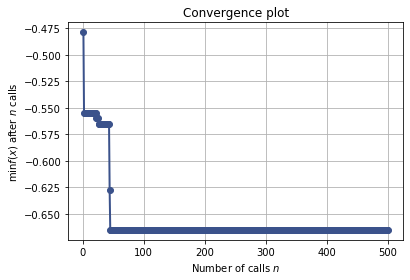

In [81]:
print (res_gp.x)
from skopt.plots import plot_convergence

plot_convergence(res_gp)

In [64]:
best_sph_sqrt_001_025step = best_sph

In [52]:
best_old = best

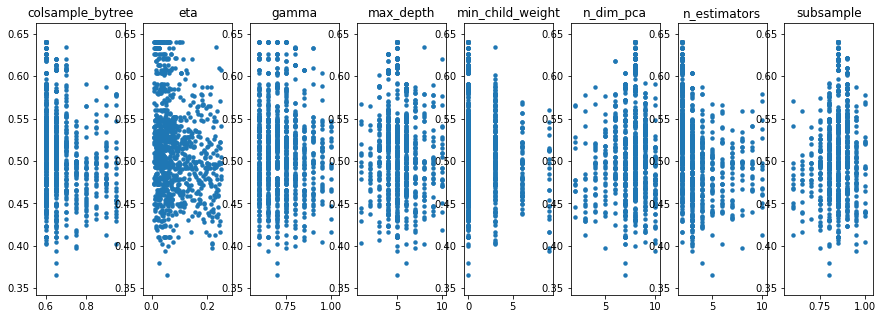

In [68]:
parameters = ['colsample_bytree','eta', 'gamma', 'max_depth', 'min_child_weight', 'n_dim_pca', 'n_estimators', 'subsample']
import matplotlib.pyplot as plt
ncols = len(parameters)
f, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 5))
cmap = plt.cm.jet

for i, val in enumerate(parameters):
    xs = np.array([t['misc']['vals'][val] for t in trials.trials]).ravel()
    ys = [-t['result']['loss'] for t in trials.trials]
    xs, ys = zip(*sorted(zip(xs, ys)))
    ys = np.array(ys)
    if ncols > 1:
        axes[i].scatter(xs, ys, s=20, linewidth=0.01)
        axes[i].set_title(val)
    else:
        axes.scatter(xs, ys, s=20, linewidth=0.01)
        axes.set_title(val)

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X=md_sph)
print(pca.explained_variance_ratio_)

[5.34626198e-01 1.35490901e-01 6.99163785e-02 5.09046888e-02
 2.94558194e-02 2.25406211e-02 1.96477387e-02 1.47723432e-02
 9.98939818e-03 9.09326685e-03 8.10006663e-03 5.84532783e-03
 5.63879397e-03 5.03541157e-03 4.05092741e-03 3.92173413e-03
 3.51955302e-03 3.31918862e-03 2.89564514e-03 2.76051602e-03
 2.47807108e-03 2.43446398e-03 2.24053293e-03 2.16276315e-03
 2.08704151e-03 1.87616355e-03 1.77443692e-03 1.66576873e-03
 1.49308108e-03 1.46177996e-03 1.43848027e-03 1.32919158e-03
 1.29735303e-03 1.17951217e-03 1.13407472e-03 1.09800839e-03
 1.07866295e-03 1.05847060e-03 1.05350447e-03 9.36847871e-04
 9.09801135e-04 9.01415743e-04 8.61907662e-04 8.30884622e-04
 7.95972000e-04 7.79893300e-04 7.18258987e-04 7.13850128e-04
 6.95352392e-04 6.83507774e-04 6.52495213e-04 6.26046704e-04
 5.98328368e-04 5.80358419e-04 5.69679508e-04 5.44980105e-04
 5.38275952e-04 5.27809479e-04 5.09994971e-04 5.04429491e-04
 4.88622712e-04 4.83311804e-04 4.74270968e-04 4.67232655e-04
 4.51312111e-04 4.437141

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
import xgboost as xgb

scaler = StandardScaler()
pca= PCA()
feat_selector_l0 = SelectKBest(k=10)
#SelectKBest(k=10)
#SVM_L0(verbose=1, C=.00000000000000000001,  min_feats_num=100)
clf = LinearSVC(C=.0000001, class_weight={1: float(np.sum(labels == -1)) / float(np.sum(labels == 1))})
#xgb.XGBClassifier()
#LinearSVC(C=.0000001, class_weight={1: float(np.sum(labels == -1)) / float(np.sum(labels == 1))})
#RandomForestClassifier(n_estimators=10, min_samples_leaf=30, min_samples_split=50, random_state=0, class_weight={1: float(np.sum(labels == -1)) / float(np.sum(labels == 1))})
#AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=1.0, algorithm=’SAMME.R’, random_state=None)
#
svm_pipeline = Pipeline([('pca', pca),#('scaler', scaler), 
                         #('feat_select', feat_selector_l0),
                         ('svc', clf)])

In [8]:
from sklearn.metrics import balanced_accuracy_score
scores_c = {}
scores_all_c = {}
scores_train = {}
feats_num = 1
#C=.000002
#for feats_num in [100, 1000,10000,30000]:
#for C in [.00000004, .00000005, .00000006, .00000007, .00000008, .00000009, .0000001, .0000002, .0000003, .0000004]:
for C in [.0000005, .0000006, .0000007, .0000008, .0000009, .000001, .000002, .000003,.000004,.000005,.000006,.000007,.000008,.000009,.00001, .00002, .00003, .00004, .00005, .00006, .00007]:
#for C in [.00000000005, .00000000006, .00000000007, .00000000008, .00000000009, .0000000001, .0000000002, .0000000003,.0000000004,.0000000005,.0000000006,.0000000007,.0000000008,.0000000009,.000000001, .000000002, .000000003, .000000004, .000000005, .000000006, .000000007]:    
#for C in [.00008, .00009, .0001, .0002, .0003, .0004, .0005, .0006, .0007, .0008, .0009, .001, .002, .003, .004, .005, .006, .007]:
#for C in [.002, .003, .004, .005, .006, .007]:
#for C in [.00000000001, .0000000001, .000000001, .00000001, .0000001, .000001, .00001, .0001, .001, .01, .1,1, 10, 100 ]:
        print (C)
        clf = svm_pipeline
        clf.set_params(svc__C=C)
        #clf.set_params(feat_select__min_feats_num=feats_num)
        #clf.set_params(feat_select__k=feats_num)
        splits = min((labels==1).sum(), (labels==-1).sum())

        clf.fit(md, labels)
        print(balanced_accuracy_score(labels, clf.predict(md)))
        scores_train[str(C) + " " + str(feats_num)] = balanced_accuracy_score(labels, clf.predict(md))

        scores = cross_val_score(clf, md, labels, cv=splits, scoring='balanced_accuracy')
        scores_c[str(C) + " " + str(feats_num)] = scores.mean()
        scores_all_c[str(C) + " " + str(feats_num)] = scores
        print(scores.mean())
        print(list(scores))

5e-07
0.7295669630054489
0.5885416666666667
[0.25, 0.5, 0.5, 0.375, 0.25, 0.375, 1.0, 0.375, 0.375, 0.125, 0.125, 0.375, 0.5, 0.375, 0.375, 0.5, 0.375, 0.5, 0.875, 1.0, 0.875, 0.875, 1.0, 0.875, 0.375, 0.5, 0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 0.875, 1.0, 0.875, 0.875, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.75, 1.0, 1.0, 0.5, 0.625, 1.0, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 0.3333333333333333, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.5, 0.5, 0.5, 0.0, 0.5, 0.16666666666666666, 0.16666666666666666, 0.0, 0.3333333333333333, 0.6666666666666666, 0.16666666666666666, 0.16666666666666666, 0.5, 0.5, 0.5, 0.6666666666666666, 0.6666666666666666, 0.16666666666666666, 0.0, 0.3333333333333333, 0.16666666666666666, 0.8333333333333333, 0.6666666666666666, 0.0]
6e-07
0.7311442500716949
0.5885416666666667
[0.25, 0.5, 0.5, 0.375, 0.25, 0.375, 1.0, 0.375, 0.375, 0.125, 0.125, 0.375, 0.5, 0.375, 0.375, 0.5, 0.375, 0.5, 0.875, 1.0, 0.875, 0.875, 

E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.5984848484848485
[0.25, 0.5, 0.5, 0.5, 0.375, 0.375, 1.0, 0.375, 0.5, 0.375, 0.125, 0.25, 0.5, 0.375, 0.375, 0.375, 0.375, 0.5, 0.5, 1.0, 0.875, 0.875, 0.5, 0.875, 0.5, 1.0, 0.5, 0.5, 0.875, 0.5, 1.0, 1.0, 1.0, 0.875, 0.375, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.75, 1.0, 1.0, 0.5, 0.75, 0.875, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 0.16666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.6666666666666666, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.5, 0.5, 0.6666666666666666, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.16666666666666666, 0.8333333333333333, 0.16666666666666666, 0.16666666666666666]
7e-06


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9261722110696875


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.5965909090909091
[0.25, 0.5, 0.5, 0.5, 0.375, 0.375, 1.0, 0.375, 0.5, 0.375, 0.125, 0.25, 0.5, 0.375, 0.375, 0.375, 0.375, 0.5, 0.5, 1.0, 0.875, 0.875, 0.5, 0.875, 0.5, 1.0, 0.5, 0.5, 0.875, 0.5, 1.0, 0.5, 1.0, 0.875, 0.375, 1.0, 1.0, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 0.75, 1.0, 1.0, 0.5, 0.75, 0.875, 1.0, 1.0, 0.5, 0.5, 1.0, 0.5, 0.5, 0.16666666666666666, 0.6666666666666666, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.8333333333333333, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.5, 0.5, 0.6666666666666666, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.16666666666666666, 0.8333333333333333, 0.3333333333333333, 0.16666666666666666]
8e-06


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9293267852021796


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.5909090909090909
[0.25, 0.5, 0.5, 0.5, 0.375, 0.375, 1.0, 0.375, 0.5, 0.375, 0.125, 0.25, 0.5, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 1.0, 0.875, 0.875, 0.5, 0.875, 0.5, 0.5, 0.375, 0.5, 0.875, 0.5, 1.0, 0.5, 1.0, 0.875, 0.375, 1.0, 1.0, 0.75, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.25, 1.0, 1.0, 0.5, 0.875, 0.875, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.16666666666666666, 0.8333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.8333333333333333, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.5, 0.5, 0.6666666666666666, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666]
9e-06


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9293267852021796


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.5909090909090909
[0.25, 0.5, 0.5, 0.5, 0.375, 0.375, 1.0, 0.375, 0.5, 0.875, 0.125, 0.25, 0.5, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 1.0, 0.875, 0.875, 0.5, 0.875, 0.5, 0.5, 0.375, 0.5, 0.875, 0.5, 1.0, 0.5, 1.0, 0.875, 0.375, 1.0, 1.0, 0.75, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 0.25, 1.0, 1.0, 0.5, 0.875, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.16666666666666666, 0.8333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.8333333333333333, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.5, 0.5, 0.6666666666666666, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666]
1e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9381631775164898


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.5918560606060606
[0.25, 0.5, 0.5, 0.5, 0.375, 0.375, 1.0, 0.375, 0.5, 0.875, 0.125, 0.375, 0.5, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 1.0, 0.875, 0.875, 0.5, 0.875, 0.5, 0.5, 0.375, 0.5, 0.875, 0.5, 1.0, 0.5, 1.0, 0.875, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 0.25, 1.0, 1.0, 0.5, 0.875, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.16666666666666666, 0.8333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.8333333333333333, 0.0, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.6666666666666666, 0.5, 0.6666666666666666, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.16666666666666666, 0.5, 0.3333333333333333, 0.16666666666666666]
2e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9643497275595068


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.6017992424242423
[0.25, 0.5, 0.5, 0.5, 0.5, 0.375, 1.0, 0.375, 0.5, 0.875, 0.375, 0.375, 0.5, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 1.0, 0.5, 0.875, 0.5, 0.75, 1.0, 0.5, 0.375, 0.5, 0.875, 0.5, 1.0, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.875, 1.0, 0.5, 1.0, 1.0, 0.25, 0.5, 1.0, 0.5, 0.875, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.8333333333333333, 0.5, 0.6666666666666666, 1.0, 0.16666666666666666, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.16666666666666666, 0.0, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 0.8333333333333333, 0.6666666666666666, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666]
3e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9858044164037855


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.6107954545454545
[0.25, 0.5, 0.5, 0.5, 1.0, 0.375, 1.0, 0.375, 0.5, 0.875, 0.375, 0.5, 1.0, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 1.0, 0.5, 0.875, 0.5, 0.25, 1.0, 0.5, 0.375, 0.5, 0.75, 0.5, 1.0, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.875, 1.0, 0.5, 1.0, 1.0, 0.375, 0.5, 1.0, 0.5, 0.875, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.8333333333333333, 0.5, 0.16666666666666666, 1.0, 0.16666666666666666, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.0, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.6666666666666666, 1.0, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666]
4e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9873817034700316


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.5984848484848484
[0.25, 0.5, 0.375, 0.5, 1.0, 0.375, 1.0, 0.375, 0.5, 0.875, 0.375, 0.5, 1.0, 0.375, 0.375, 0.75, 0.375, 0.5, 0.5, 1.0, 0.5, 0.875, 0.5, 0.25, 1.0, 0.5, 0.375, 0.5, 0.75, 0.5, 1.0, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.375, 1.0, 0.5, 1.0, 1.0, 0.375, 0.5, 1.0, 0.5, 0.875, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.8333333333333333, 0.5, 0.16666666666666666, 1.0, 0.3333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.0, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 1.0, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666]
5e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9936908517350158


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.6013257575757576
[0.25, 0.5, 0.5, 0.5, 1.0, 0.375, 1.0, 0.375, 0.5, 0.875, 0.375, 0.5, 1.0, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 1.0, 0.5, 0.875, 0.5, 0.25, 1.0, 0.5, 0.375, 0.5, 0.75, 0.5, 1.0, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.375, 1.0, 0.5, 1.0, 1.0, 0.375, 0.5, 1.0, 0.5, 0.875, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 0.3333333333333333, 0.6666666666666666, 0.5, 0.16666666666666666, 1.0, 0.3333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.0, 0.16666666666666666, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 1.0, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666]
6e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9952681388012619


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.5942234848484849
[0.25, 0.5, 0.5, 0.5, 1.0, 0.375, 1.0, 0.375, 0.5, 0.875, 0.375, 0.5, 1.0, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 0.5, 0.5, 0.875, 0.5, 0.25, 1.0, 0.5, 0.375, 0.5, 0.75, 0.5, 1.0, 0.375, 1.0, 0.875, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.375, 1.0, 0.5, 1.0, 1.0, 0.375, 0.5, 1.0, 0.5, 0.875, 0.5, 1.0, 1.0, 0.5, 0.8333333333333333, 1.0, 0.5, 1.0, 0.3333333333333333, 0.6666666666666666, 0.5, 0.16666666666666666, 1.0, 0.3333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 1.0, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666]
7e-05


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9968454258675079


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

0.590435606060606
[0.25, 0.5, 0.5, 0.5, 1.0, 0.375, 1.0, 0.375, 0.5, 0.875, 0.375, 0.5, 1.0, 0.375, 0.375, 0.875, 0.375, 0.5, 0.5, 0.5, 0.5, 0.875, 0.5, 0.25, 1.0, 0.5, 0.375, 0.5, 0.75, 0.5, 1.0, 0.375, 1.0, 1.0, 0.5, 1.0, 1.0, 0.75, 1.0, 0.5, 0.375, 1.0, 0.5, 1.0, 1.0, 0.375, 0.375, 1.0, 0.5, 0.875, 0.5, 1.0, 1.0, 0.5, 0.8333333333333333, 1.0, 0.5, 1.0, 0.3333333333333333, 0.8333333333333333, 0.5, 0.16666666666666666, 1.0, 0.3333333333333333, 0.8333333333333333, 0.8333333333333333, 0.8333333333333333, 0.3333333333333333, 0.0, 0.3333333333333333, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.16666666666666666, 1.0, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.8333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.16666666666666666]


E:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
print(scores_c)

{'5e-07 1': 0.5885416666666667, '6e-07 1': 0.5885416666666667, '7e-07 1': 0.581439393939394, '8e-07 1': 0.581439393939394, '9e-07 1': 0.584753787878788, '1e-06 1': 0.5904356060606061, '2e-06 1': 0.5890151515151515, '3e-06 1': 0.5894886363636364, '4e-06 1': 0.5946969696969697, '5e-06 1': 0.6027462121212122, '6e-06 1': 0.5984848484848485, '7e-06 1': 0.5965909090909091, '8e-06 1': 0.5909090909090909, '9e-06 1': 0.5909090909090909, '1e-05 1': 0.5918560606060606, '2e-05 1': 0.6017992424242423, '3e-05 1': 0.6107954545454545, '4e-05 1': 0.5984848484848484, '5e-05 1': 0.6013257575757576, '6e-05 1': 0.5942234848484849, '7e-05 1': 0.590435606060606}


In [7]:
import sys
import numpy as np

from sklearn.base import BaseEstimator, ClassifierMixin,clone
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC


class SVM_L0(BaseEstimator):
    def __init__(self, C=1.0, eps=0.000005, \
                 estimator=LinearSVC(C=10000000000.0, max_iter=1000, loss='hinge'), verbose=0, \
                 n_iter=1000, min_feats_num=30000):
        """
        feature_selection:
            True: use predict_estimator to predict data
            False: use 'z' coefs to predict data
        scale:
            don't supported, always acts like scale=True: uses StandardScaler
        """

        self.verbose = verbose
        self.trainer = None
        # parameter for regularization
        self.C = C

        # stop criterion parameters
        self.eps = eps
        self.n_iter = n_iter
        self.min_feats_num = min_feats_num
        # estimator
        self.estimator = estimator

        # parameters for fit
        self.z = None
        self.inds = None
        self.intercept_ = None

        return

    def prepareGraphics(self):
        """
        """
        from matplotlib import pyplot as plt

        # initialize
        plt.ion()
        self.fig = plt.figure()
        self.ax1 = self.fig.add_subplot(121)
        self.ax2 = self.fig.add_subplot(122)

        return

    def drawZ(self, z_full, z_old_full, ymax=2.0):
        """
        """

        self.ax1.clear()
        self.ax2.clear()
        # self.ax1.set_ylim(0,ymax)
        self.ax1.bar(range(len(z_full)), z_full, color='blue')
        self.ax2.set_ylim(0, 0.1)
        self.ax2.bar(range(len(z_full)), abs(z_full - z_old_full))
        self.fig.canvas.draw()
        self.fig.canvas.flush_events()

        return

    def fit(self, X, y):
        """
        Make SVML0 without matrix update (without removing unused features)
        """

        if self.verbose >= 10:
            self.prepareGraphics()

        y = np.array(y)

        # y must have +1,-1 labels, check
        assert np.all((y == 1) + (y == -1))
        self.non_zero_cols = (X > 0.0).sum(axis=0) > 0
        X = X[:, self.non_zero_cols]
        # copy X, scale it , add regularization cols
        # regularization matrix
        _reg_mat = 1.0 / self.C * np.ones((X.shape[0], X.shape[0]))

        # add regularization mat to data matrix
        X = np.concatenate((X, _reg_mat), axis=1)

        # selected columns
        # sel_inds = np.array(range(X.shape[1]))
        # sel_inds_prev = np.array(sel_inds)
        z = np.ones((1, X.shape[1]))
        z_prev = np.zeros((1, X.shape[1]))

        inds = np.array(range(X.shape[1]))

        trainer = None

        _counter = 0
        non_changed_iter = 0
        while non_changed_iter < 10 and _counter < self.n_iter:
            has_changes = (np.abs((z > 0.0).astype(int) - (z_prev > 0.0).astype(int))).sum() > 0
            non_changed_iter = 0 if has_changes else non_changed_iter + 1
            #number of features which are non-additional
            subset_non_add = inds < (X.shape[1] - X.shape[0])
            z_non_add = z[:, subset_non_add]
            non_zero_features = (z_non_add > self.eps * np.max(z_non_add)).sum()
            print (non_zero_features)
            #stop if number of features is less then we need
            if non_zero_features < self.min_feats_num:                
                z_prev_non_add = z_prev[:, subset_non_add]
                #select top min_feats_num features from z_prev
                thresh = np.quantile(z_prev_non_add, max(0.0, 1.0 - float(self.min_feats_num) / float(z_prev_non_add.shape[1])))                
                z_prev[z_prev < thresh] = 0.0                
                z = z_prev
                break
            # get subset from previous subset
            subset = abs(z[0]) > self.eps * np.max(z_non_add)
            z = z[:, subset]
            inds = inds[subset]
            
            # prepare matrix mat
            mat = X[:, inds] * z

            # calculate new z
            trainer = clone(self.estimator)
            # set trainer to be weighted
            trainer.set_params(class_weight={1: float(np.sum(y == -1)) / float(np.sum(y == 1))})
            trainer.fit(mat, y)

            z_prev = z
            z = z * trainer.coef_

            if self.verbose > 0:
                print("\r" + str(_counter) + " | " + \
                                 str(np.max(abs(z - z_prev))) + " | " + \
                                 str(np.max(z)) + " | " + str(len(inds)) + " | ")
                sys.stdout.flush()

                if self.verbose >= 10:
                    # draw z full
                    _z_full = np.zeros(X.shape[1])
                    _z_full[inds] = z[0]
                    _z_old_full = np.zeros(X.shape[1])
                    _z_old_full[inds] = z_prev[0]
                    self.drawZ(_z_full, _z_old_full)

            _counter += 1

        # remove regularizator inds
        subset = np.bitwise_and(inds < (X.shape[1] - X.shape[0]), abs(z[0]) > 0.0)
        inds = inds[subset]
        z = z[:, subset]
        print(inds.shape)
        print(non_zero_features)
        
        sys.stdout.flush()
        self.inds = inds
        self.z = z
        self.intercept_ = trainer.intercept_

        if self.verbose > 0:
            sys.stdout.write("\n")

        return self

    def transform(self, X):
        """
        """
        mat = X[:, self.non_zero_cols]
        mat = mat[:, self.inds]
        return mat
